## Task - 1

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
purchases_df = pd.read_csv('QVI_purchase_behaviour.csv')
purchases_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transactions_df = pd.read_excel('QVI_transaction_data.xlsx')
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print(f'null values in purchases_df: {purchases_df.isnull().sum().sum()}')
print(f'null values in transactions_df: {transactions_df.isnull().sum().sum()}')
print(f'number of duplicated rows in purchases_df: {purchases_df.duplicated().sum()}')
print(f'number of duplicated rows in transactions_df: {transactions_df.duplicated().sum()}')
transactions_df.drop_duplicates(inplace=True, keep='first')
print(f'number of duplicated rows in transactions_df after droping duplicates: {transactions_df.duplicated().sum()}')

null values in purchases_df: 0
null values in transactions_df: 0
number of duplicated rows in purchases_df: 0
number of duplicated rows in transactions_df: 1
number of duplicated rows in transactions_df after droping duplicates: 0


In [6]:
transactions_df['DATE'] = pd.to_datetime(transactions_df['DATE'], origin='1899-12-30', unit='D')

In [7]:
merged_df = pd.merge(transactions_df, purchases_df, on='LYLTY_CARD_NBR', how='left')
print(transactions_df.shape, purchases_df.shape, merged_df.shape)

(264835, 8) (72637, 3) (264835, 10)


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NBR         264835 non-null  int64         
 2   LYLTY_CARD_NBR    264835 non-null  int64         
 3   TXN_ID            264835 non-null  int64         
 4   PROD_NBR          264835 non-null  int64         
 5   PROD_NAME         264835 non-null  object        
 6   PROD_QTY          264835 non-null  int64         
 7   TOT_SALES         264835 non-null  float64       
 8   LIFESTAGE         264835 non-null  object        
 9   PREMIUM_CUSTOMER  264835 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [9]:
# looking for outliers
extremely_large_transactions = merged_df.loc[merged_df['PROD_QTY'] > 5]
print(f'number of extreme values: {extremely_large_transactions.shape[0]}')
clean_df = merged_df.drop(extremely_large_transactions.index)
clean_df['PACK_SIZE'] = clean_df['PROD_NAME'].str.extract(r'(\d+)').astype('int')

number of extreme values: 2


In [10]:
clean_df['BRAND'] = clean_df['PROD_NAME'].str.split().str[0]

In [11]:
clean_df[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,264833.000000,264833.000000
mean,1.905812,7.299351
std,0.343437,2.527244
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,5.000000,29.500000


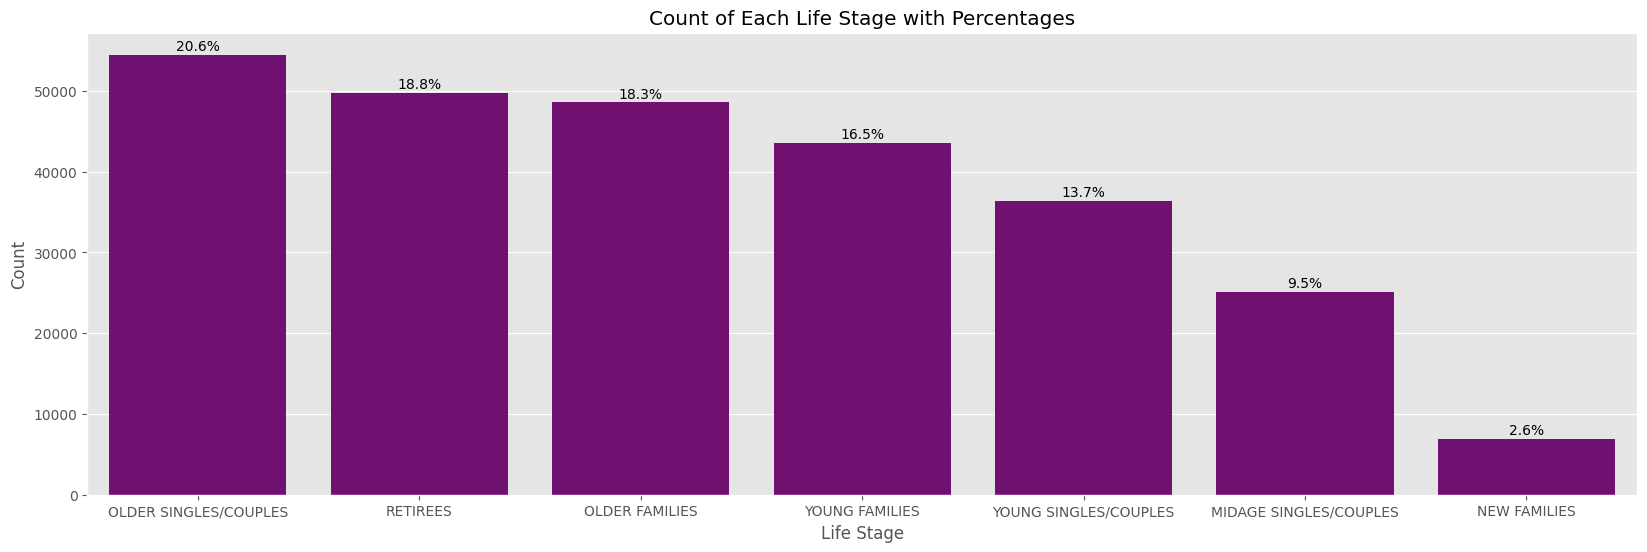

In [12]:
# Customer Lifestage segmentation
plt.style.use('ggplot')
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='LIFESTAGE', data=clean_df, order=clean_df['LIFESTAGE'].value_counts().index, color='purple')

# Calculating the percentages
total = len(clean_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.002 * total
    ax.text(x, y, percentage, ha='center', size=10)

# Customizing the plot
plt.xticks(size=10)
plt.title('Count of Each Life Stage with Percentages')
plt.xlabel('Life Stage')
plt.ylabel('Count')
plt.show()

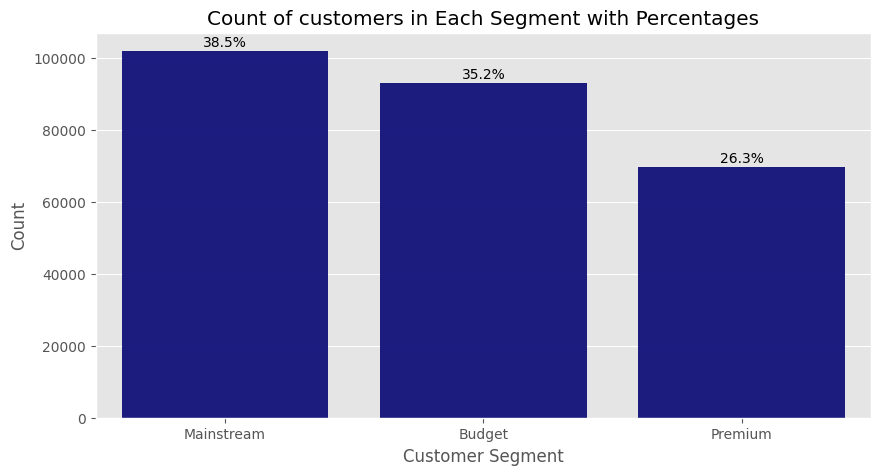

In [13]:
# Customer type segmentation
plt.figure(figsize=(10, 5))
g = sns.countplot(x='PREMIUM_CUSTOMER', data=clean_df, order=clean_df['PREMIUM_CUSTOMER'].value_counts().index, color='darkblue', alpha=0.95)

# Calculating the percentages
total = len(clean_df)
for p in g.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.005 * total
    g.text(x, y, percentage, ha='center', size=10)
g.set_title('Count of customers in Each Segment with Percentages')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

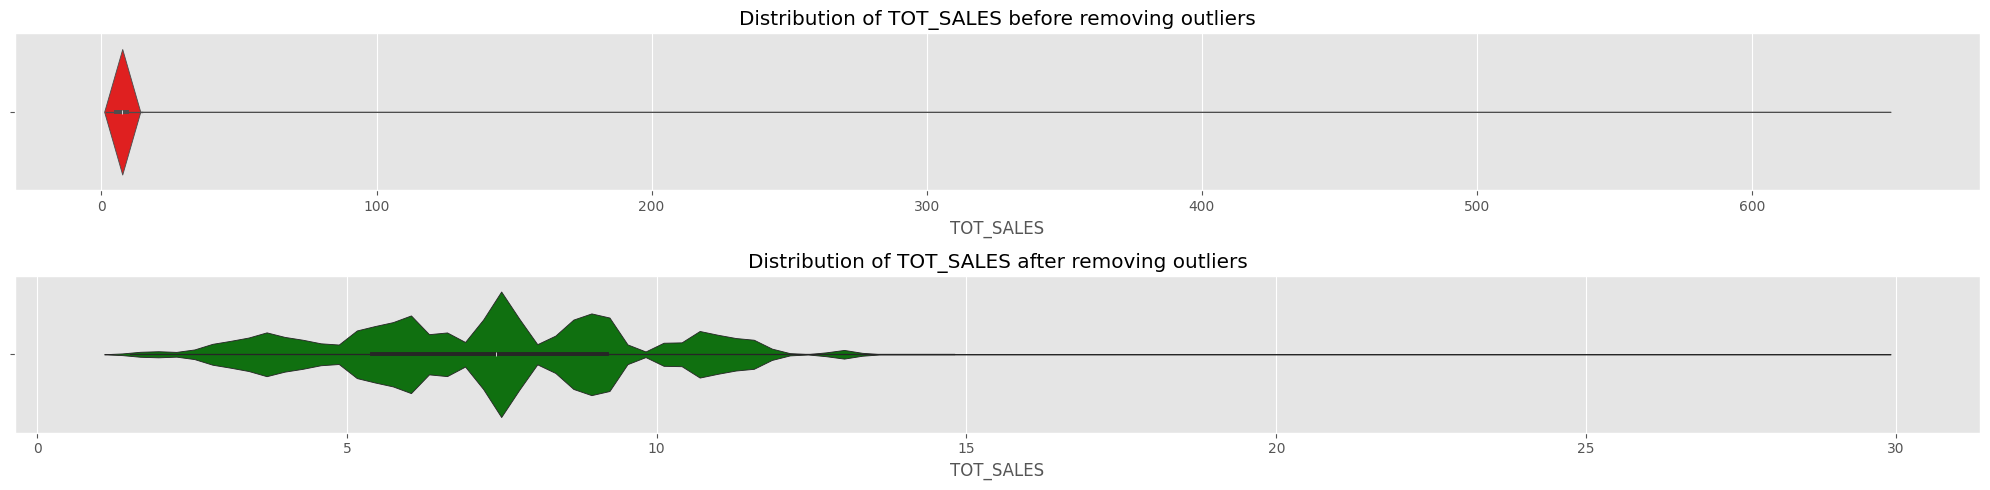

In [14]:
# Distribution of TOT_SALES before and after removing outliers
fig, ax = plt.subplots(2, 1, figsize=(20, 5))
sns.violinplot(x='TOT_SALES', data=merged_df, ax=ax[0], color='red')
sns.violinplot(x='TOT_SALES', data=clean_df, ax=ax[1], color='green')
ax[0].set_title('Distribution of TOT_SALES before removing outliers')
ax[1].set_title('Distribution of TOT_SALES after removing outliers')
plt.tight_layout()
plt.show()

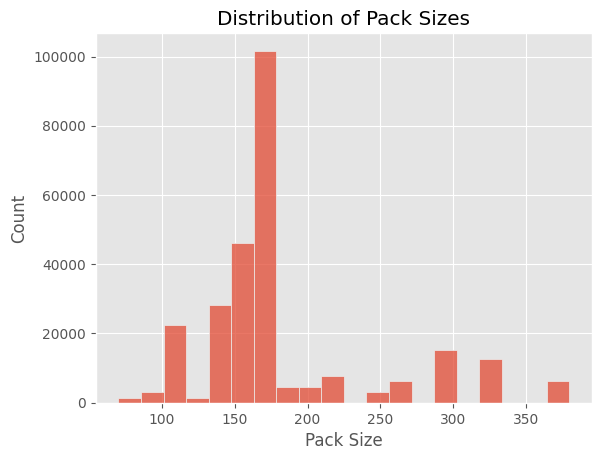

In [15]:
# Distribution of pack sizes
sns.histplot(x='PACK_SIZE', data=clean_df, bins=20)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.show()

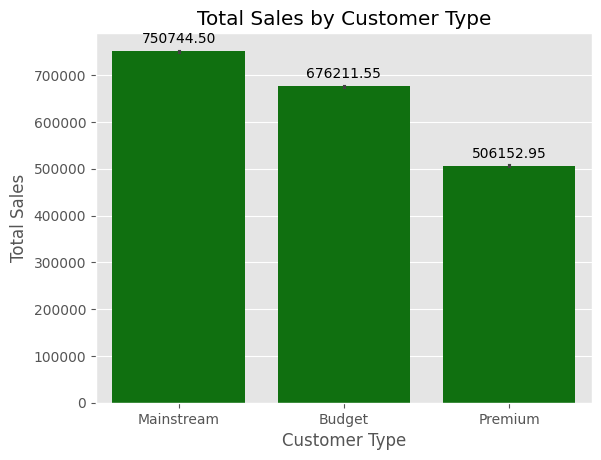

In [16]:
# Total sales grouped by customer type
g = sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=clean_df, estimator=sum, order=clean_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False).index, color='green')
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
g.set_title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

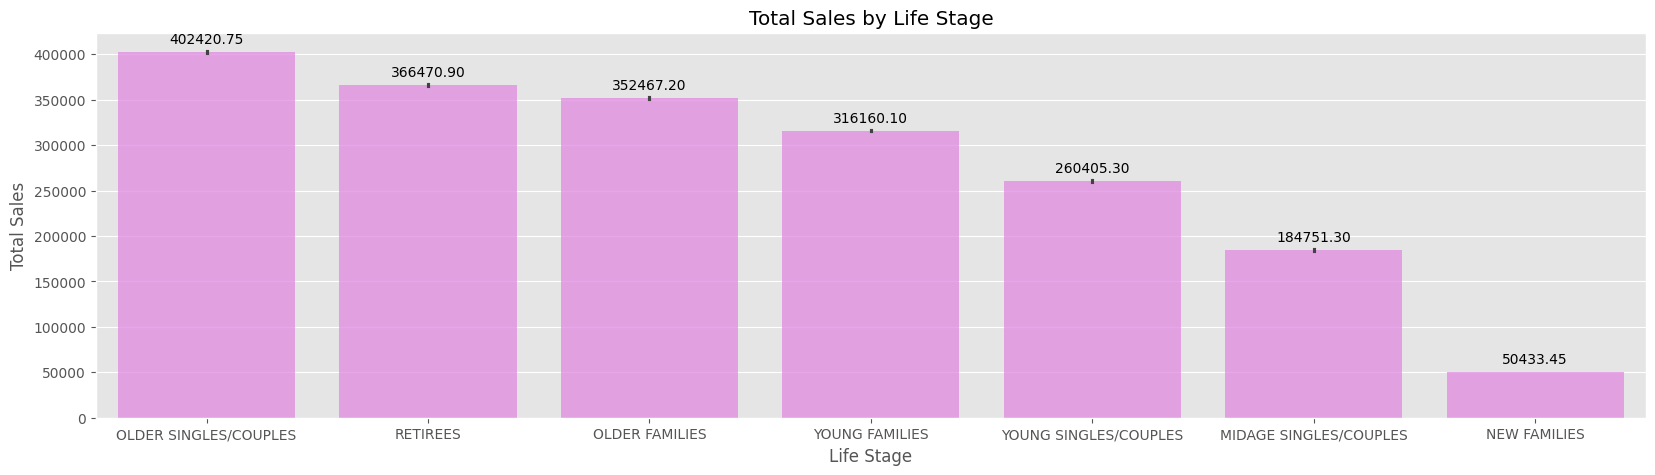

In [17]:
# Total sales grouped by lifestage
fig, ax = fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', estimator=sum, order=clean_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).index, data=clean_df, color='violet', alpha=0.8)

# Annotate the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 9), 
               textcoords='offset points')

# Customize the plot
plt.title('Total Sales by Life Stage')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.show()

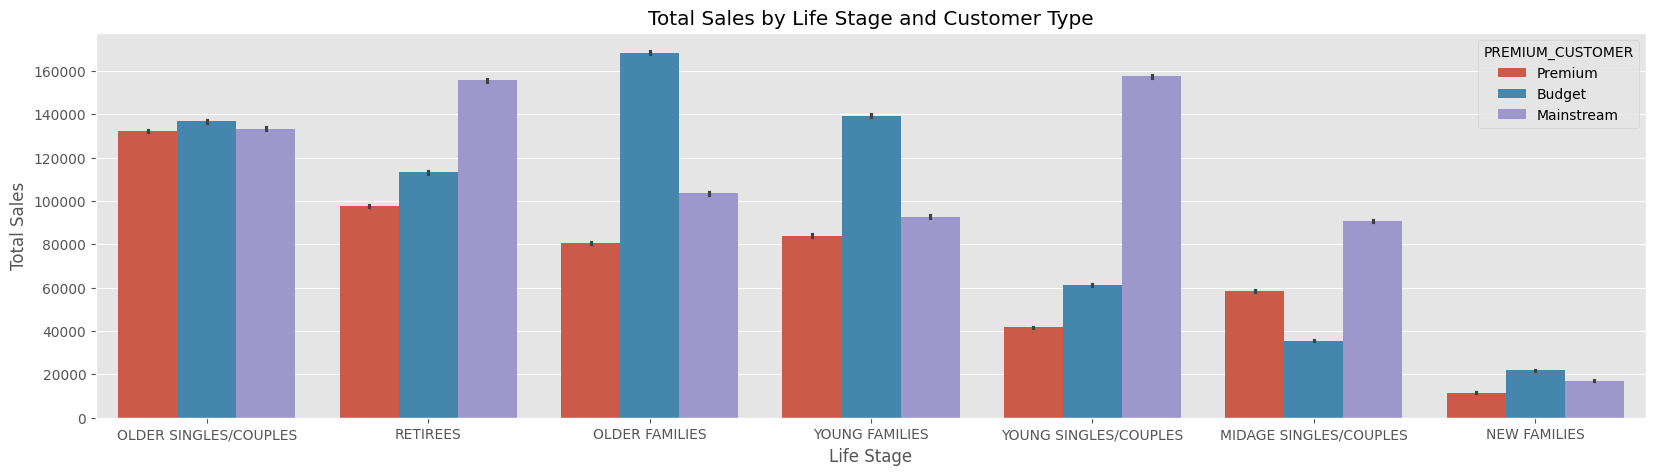

In [18]:
# Total sales grouped by lifestage and customer type
plt.figure(figsize=(20, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', estimator=sum, order=clean_df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).index, hue='PREMIUM_CUSTOMER', data=clean_df)
plt.title('Total Sales by Life Stage and Customer Type')
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.show()

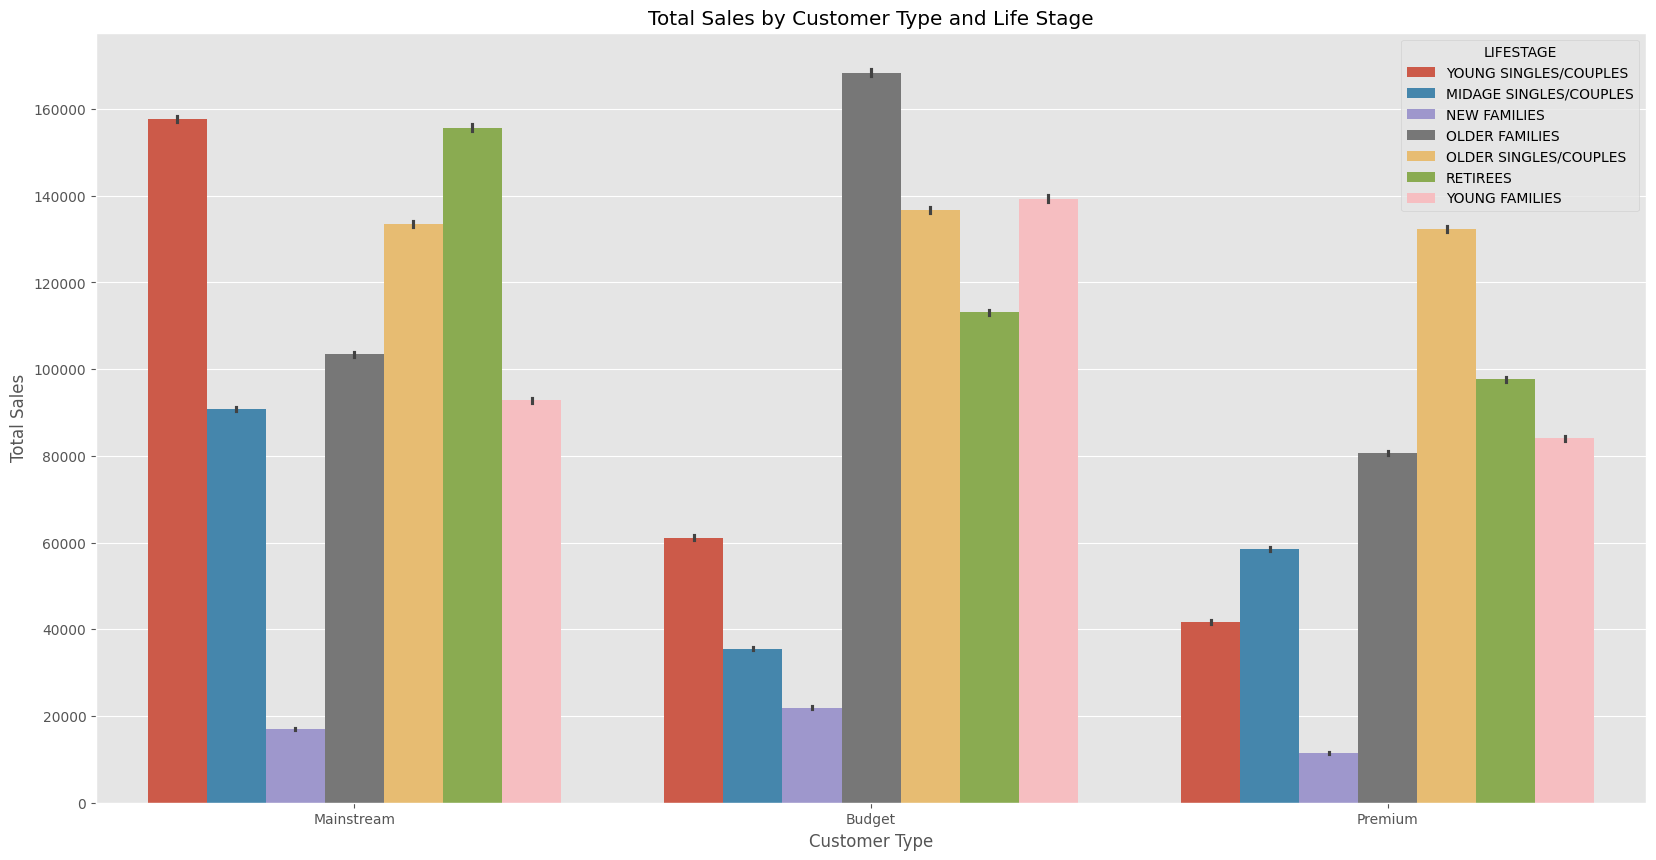

In [19]:
# Total sales grouped by customer type and lifestage
plt.figure(figsize=(20, 10))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', estimator=sum, order=clean_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False).index, hue='LIFESTAGE', data=clean_df)
plt.title('Total Sales by Customer Type and Life Stage')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

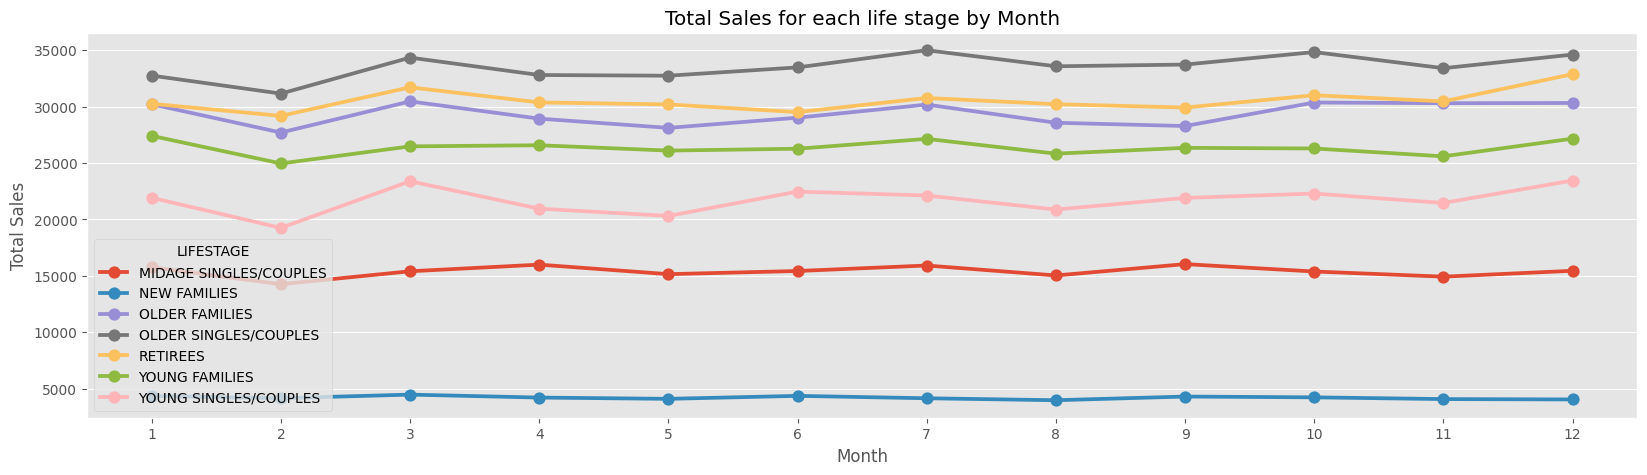

In [20]:
# Total sales by month for each life stage
clean_df['MONTH'] = clean_df['DATE'].dt.month
plt.figure(figsize=(20, 5))
sns.pointplot(x='MONTH', y='TOT_SALES', estimator=sum, data=clean_df, hue='LIFESTAGE', errorbar=None)
plt.title('Total Sales for each life stage by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales') 
plt.show()

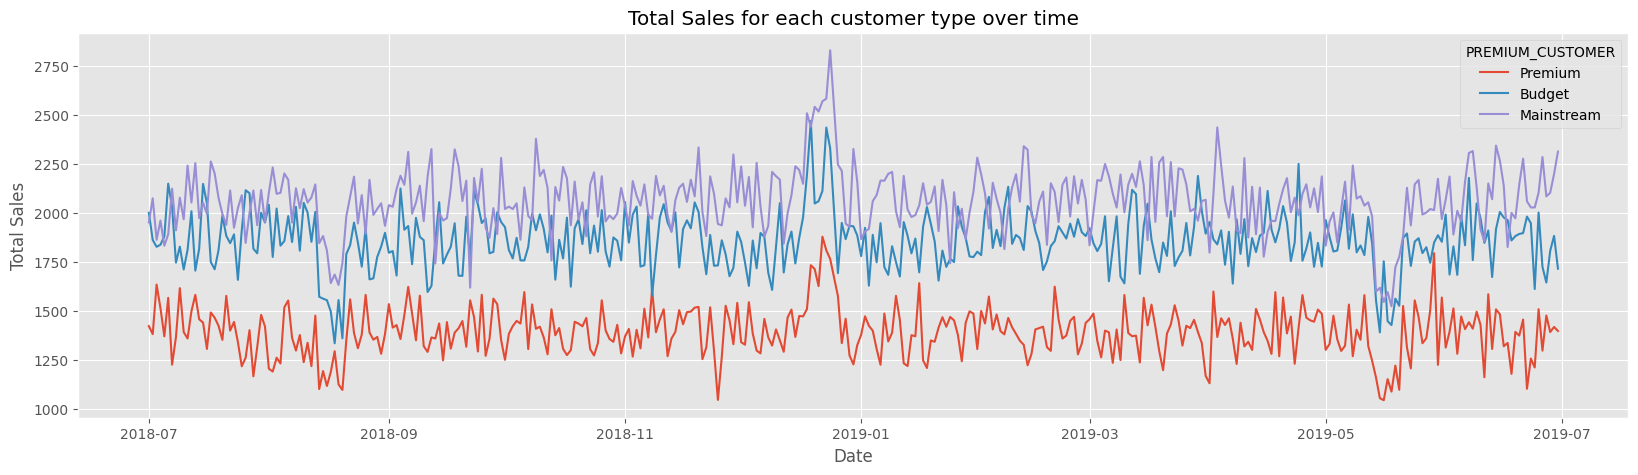

In [21]:
# Total Sales for each customer type over time
plt.figure(figsize=(20, 5))
sns.lineplot(x='DATE', y='TOT_SALES', data=clean_df, errorbar=None, hue='PREMIUM_CUSTOMER', estimator=sum)
plt.title('Total Sales for each customer type over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

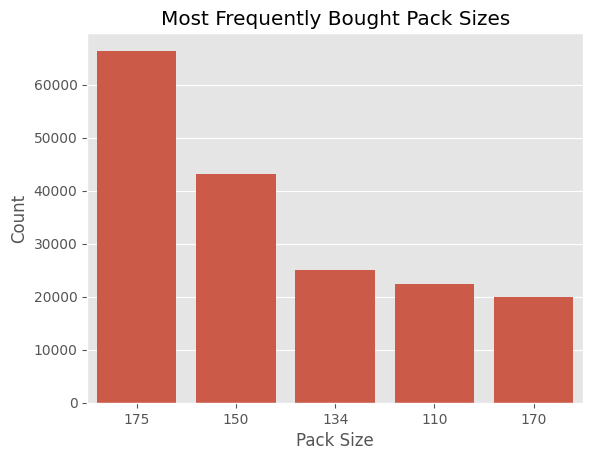

In [22]:
# Most frequently bought pack sizes
sns.countplot(x='PACK_SIZE', data=clean_df, order=clean_df['PACK_SIZE'].value_counts().index[:5])
plt.title('Most Frequently Bought Pack Sizes')
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.show()

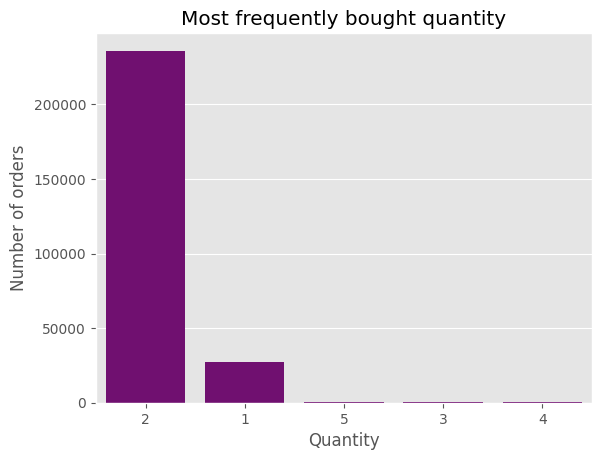

In [23]:
# Most usually bought quantity
sns.countplot(x='PROD_QTY', data=clean_df, order=clean_df['PROD_QTY'].value_counts().index, color='purple')
plt.title('Most frequently bought quantity')
plt.xlabel('Quantity')
plt.ylabel('Number of orders')
plt.show()

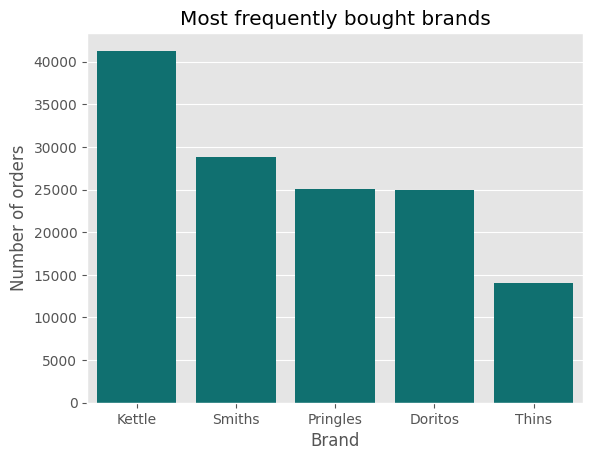

In [24]:
# Most frequently bought brands
sns.countplot(x='BRAND', data=clean_df, order=clean_df['BRAND'].value_counts().index[:5], color='teal')
plt.title('Most frequently bought brands')
plt.xlabel('Brand')
plt.ylabel('Number of orders')
plt.show()

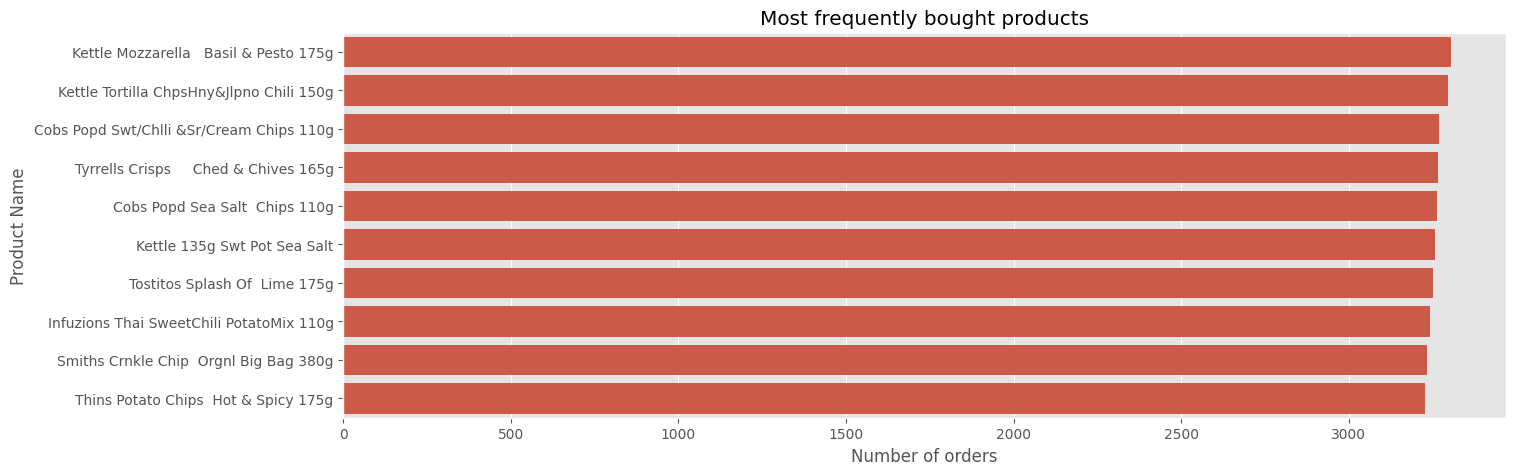

In [25]:
# Most frequently bought products
plt.figure(figsize=(15, 5))
sns.countplot(y='PROD_NAME', data=clean_df, order=clean_df['PROD_NAME'].value_counts().index[:10])
plt.title('Most frequently bought products')
plt.xlabel('Number of orders')
plt.ylabel('Product Name')
plt.show()

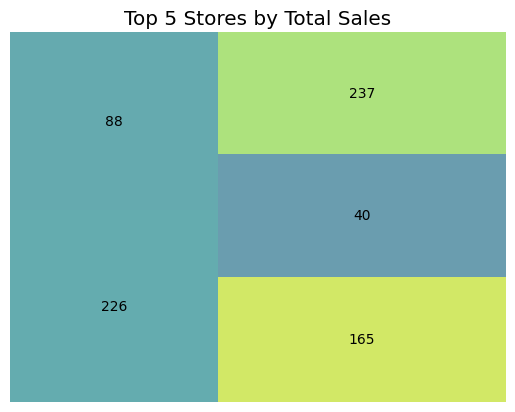

In [26]:
# Top 10 stores with the highest total sales
# plt.figure(figsize=(20, 5))
# sns.barplot(x='STORE_NBR', y='TOT_SALES', data=clean_df, estimator=sum, order=clean_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).index[:10], color='green', alpha=0.8)

import squarify

top_10_stores = clean_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(5)
squarify.plot(sizes=top_10_stores, label=top_10_stores.index, alpha=0.7)
plt.title('Top 5 Stores by Total Sales')
plt.axis('off')
plt.show()

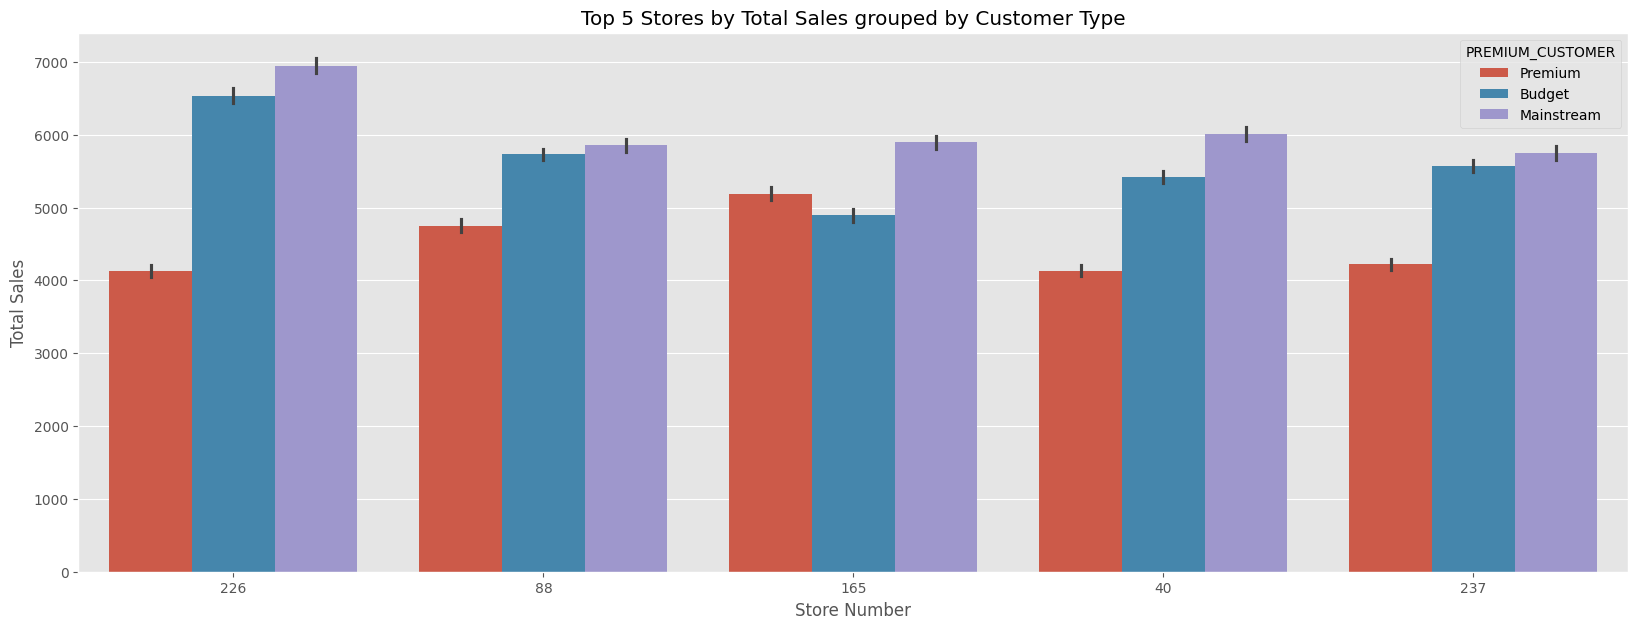

In [27]:
# Top 5 stores with the highest total sales grouped by customer type
plt.figure(figsize=(20, 7))
sns.barplot(x='STORE_NBR', y='TOT_SALES', data=clean_df, estimator=sum, order=clean_df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).index[:5], hue='PREMIUM_CUSTOMER')
plt.title('Top 5 Stores by Total Sales grouped by Customer Type')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()
# We can see that unlike most stores, store 165 has a higher sales from premium customers than budget customers

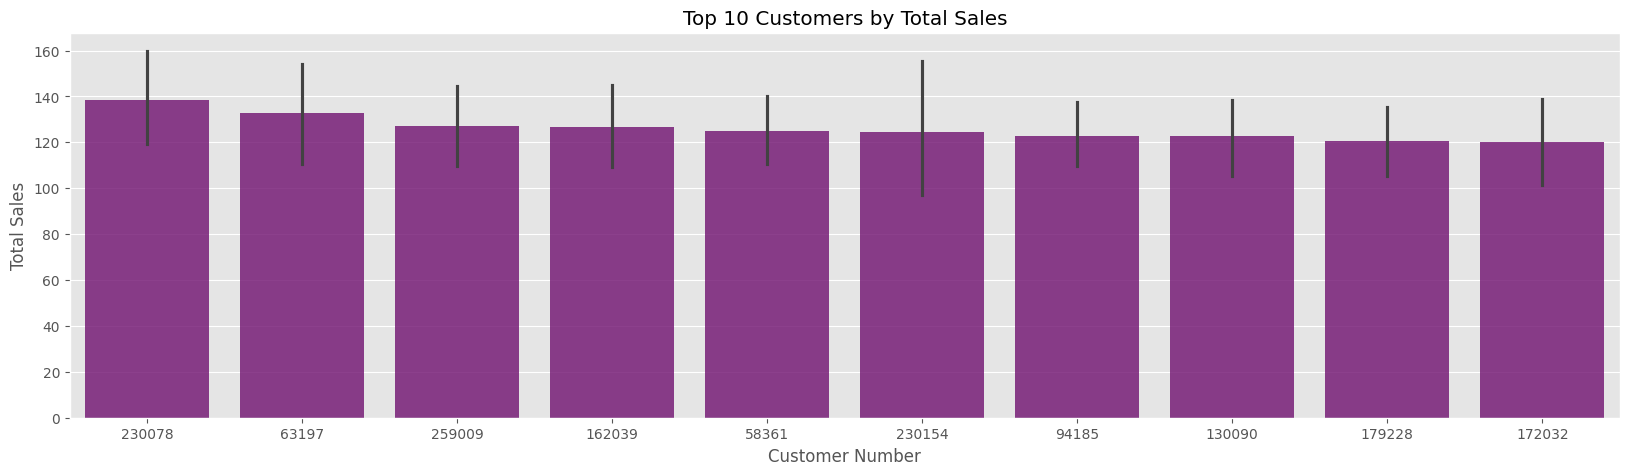

In [28]:
# Top 10 customers with the highest total sales
plt.figure(figsize=(20, 5))
sns.barplot(x='LYLTY_CARD_NBR', y='TOT_SALES', data=clean_df, estimator=sum, order=clean_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).index[:10], color='purple', alpha=0.8)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer Number')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# clean_df.to_csv('E:/Quantium Internship/final_df.csv', index=False)

# Conclusions:
<b><i>After completing the analysis we notice some trends in purchasing behaviour, products in demand, customer segments.</i></b>
- The *Older singles/couples* is the largest *Lifestage* segment.
- The *Mainstream* is the largest *PREMIUM_CUSTOMER* segment.
- The most frequently bought *Pack size* is *175*.
- The *Mainstream* segment is one with the heighest *Total Sales* among other *Premuim customer* segments.
- The *Older singles/couples* segment is the one with heighest *Total Sales* among other *Lifestage* segments.
- The *Midage singles/couples* segment has significantly higher premium customers than budget customers.
- The largest portion of our customers are multipack buyers, with 2 units as the most frequently bought quantity.
- The most popular *Brand* is *Kettle*.
- Store number 226 is the one that generated the heighest *Total Sales*.
- The customer with *Loyalty Number* 230078 is the one with heighest *Total Sales*.

# Business metric:
<b><i>I suggest using total monthly sales as the main performance indicator</i></b>

# Recommendations:
<b><i>I think the following measures will help increase the total sales:</i></b>
- Create a loyalty program for our most active customers.
- Create a marketing strategy targeting (Mainstream customers that belong to the Older singles/couples lifestage) as it's the intersection between our two most active segments.
- Create a marketing strategy targeting our least active segments but with discounts and hot offers to incentivize them and generate further sales.